# Best area to visit and Venues aroutd it in the city of pune

# importing necessery liberies 

In [2]:

 
import requests
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
import folium
import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


In [3]:
PUN_LATITUDE = 18.5204
PUN_LONGITUDE = 73.8567
print('The geograpical coordinates of Chandigarh are {}, {}.'.format(PUN_LATITUDE, PUN_LONGITUDE))

The geograpical coordinates of Chandigarh are 18.5204, 73.8567.


In [4]:

import folium

Pune_map = folium.Map(location = [PUN_LATITUDE, PUN_LONGITUDE], zoom_start = 13)
folium.Marker([PUN_LATITUDE, PUN_LONGITUDE]).add_to(Pune_map)
#Pune_map.save("maps/Pune Map.html")
Pune_map

# Phase 1 : Loading ,  cleaning and Exploring  the data From TripAdvisor                         API 

# Part 1 : Extracting the attractive places in central Pune 

In [63]:
import requests

url = "https://tripadvisor1.p.rapidapi.com/attractions/list-by-latlng"

querystring = {"distance":"2","lunit":"km","lang":"en_US","latitude":"18.5204","longitude":"73.8567"}

headers = {
    'x-rapidapi-host': "tripadvisor1.p.rapidapi.com",
    'x-rapidapi-key': "aef1900dbbmsh47692fdcbcbf2bdp1d87eajsndf558d4ef6a0"
    }

responseA = requests.request("GET", url, headers=headers, params=querystring).json()

 

In [64]:
VA = responseA['data'] 
VA = json_normalize(VA)

In [65]:
VA =  pd.DataFrame(VA , columns = ['name', 'latitude', 
                                             'longitude', 'ranking', 'rating'])

Basic Data modification to extract the ranking in easy to work form 

In [66]:
for rank in VA['ranking'] :
    SS = str(rank).split(' ')
    r  = SS[0][1:]
    if(r=='an'):
        r = '0'
    if(len(r) > 3):
        r = r[0] + r[2:]
    VA = VA.replace(to_replace =rank, 
                 value = float(r))

In [67]:
VA

,name,latitude,longitude,ranking,rating
0,City Tours,18.52043,73.85674,0.0,0
1,Sightseeing Tours,18.52043,73.85674,0.0,0
2,Self-Guided Tours & Rentals,18.52043,73.85674,0.0,0
3,Bus Tours,18.52043,73.85674,0.0,0
4,Maratha Mandir,18.52047,73.85662,206.0,3.5
5,Jangali Maharaj Temple,18.51944,73.85618,64.0,4.0
6,Movie Theaters,18.51881,73.85998,0.0,0
7,Bandiwan Maruti Mandir,18.5192,73.8609,253.0,3.5
8,Vishrambaug Samaj Mandir,18.52401,73.85404,209.0,4.0
9,Tulsi Baug Shopping Market,18.514029,73.8555,50.0,4.0


In [68]:
VA =VA[VA['ranking'] !=0]

In [69]:
VA

,name,latitude,longitude,ranking,rating
4,Maratha Mandir,18.52047,73.85662,206.0,3.5
5,Jangali Maharaj Temple,18.51944,73.85618,64.0,4.0
7,Bandiwan Maruti Mandir,18.5192,73.8609,253.0,3.5
8,Vishrambaug Samaj Mandir,18.52401,73.85404,209.0,4.0
9,Tulsi Baug Shopping Market,18.514029,73.8555,50.0,4.0
12,Aryabhushan Theatre,18.5162,73.8626,228.0,3.5
14,Phule Market,18.512726,73.85624,85.0,4.0
15,Vishram Bagh Waada Palace,18.51328,73.85317,108.0,4.0
16,Bharat Natya Sanshodhan Mandir,18.51328,73.85317,157.0,4.0
17,Laxmi Road,18.512505,73.85608,23.0,4.0


Now we have the data ready for the operation , Lets try to get more intuation out of it 

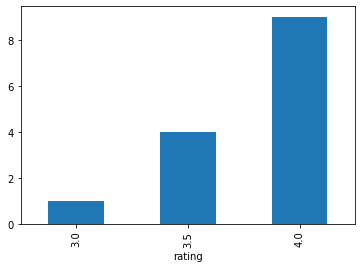

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

VA.groupby('rating')['name'].nunique().plot(kind='bar')
plt.show()

As most of the places around  the central pune have good reating mostly 4.0 

Now , lets try to visualize the locatios 

In [71]:

Pune_map = folium.Map(location = [PUN_LATITUDE, PUN_LONGITUDE], zoom_start = 13)

for  name, latitude, longitude in zip( VA['name'],  VA['latitude'],  VA['longitude']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    
    folium.CircleMarker(
        [float(latitude), float(longitude)],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Pune_map) 
    
Pune_map

Now we are good to go with Our "Attraction places data in the central pune " 

# Part 2 : Extracting the  restaurants in central Pune

In [72]:
import requests

url = "https://tripadvisor1.p.rapidapi.com/restaurants/list-by-latlng"

querystring = { "distance":"2","lunit":"km","lang":"en_US","latitude":"18.5204","longitude":"73.8567"}

headers = {
    'x-rapidapi-host': "tripadvisor1.p.rapidapi.com",
    'x-rapidapi-key': "aef1900dbbmsh47692fdcbcbf2bdp1d87eajsndf558d4ef6a0"
    }

responseR = requests.request("GET", url, headers=headers, params=querystring).json()
 

In [73]:
VR = responseR['data'] 
VR = json_normalize(VR)

In [74]:
VR =  pd.DataFrame(VR , columns = ['name', 'latitude', 
                                             'longitude', 'ranking', 'rating'])

In [75]:
VR = VR.dropna()

Basic Data modification to extract the ranking in easy to work form 

In [76]:
for rank in VR['ranking'] :
    SS = str(rank).split(' ')
    r  = SS[0][1:]
    if(r=='an'):
        r = '0'
    if(len(r) > 3):
        r = r[0] + r[2:]
    VR = VR.replace(to_replace =rank, 
                 value = float(r))

In [77]:
VR

,name,latitude,longitude,ranking,rating
0,Cafe Uptown Funk,18.52043,73.85674,3701.0,3.0
2,Cafe Nook,18.5203,73.8567,1278.0,4.5
3,rainmaker's,18.51944,73.85618,3589.0,4.0
5,Prem Ice Cream Parlour,18.5218,73.85572,2997.0,4.0
6,Nevrekar Health Home,18.51881,73.85837,3883.0,3.0
7,Sharda,18.51946,73.85453,3246.0,4.0
8,Marathwada Biryani House,18.51897,73.85387,2626.0,4.0
9,Vaidya Upahar Gruha,18.5184,73.8595,2741.0,4.0
10,MPS Garden,18.51689,73.85638,2871.0,3.5
12,Sanman Dining Hall,18.51689,73.85638,1989.0,4.0


In [78]:
VR =VR[VR['ranking'] !=0]


In [79]:
VR

,name,latitude,longitude,ranking,rating
0,Cafe Uptown Funk,18.52043,73.85674,3701.0,3.0
2,Cafe Nook,18.5203,73.8567,1278.0,4.5
3,rainmaker's,18.51944,73.85618,3589.0,4.0
5,Prem Ice Cream Parlour,18.5218,73.85572,2997.0,4.0
6,Nevrekar Health Home,18.51881,73.85837,3883.0,3.0
7,Sharda,18.51946,73.85453,3246.0,4.0
8,Marathwada Biryani House,18.51897,73.85387,2626.0,4.0
9,Vaidya Upahar Gruha,18.5184,73.8595,2741.0,4.0
10,MPS Garden,18.51689,73.85638,2871.0,3.5
12,Sanman Dining Hall,18.51689,73.85638,1989.0,4.0


Now our data is ready :) , Lets rey to get more intuation from the modified data 

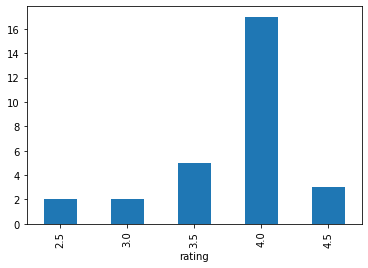

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

VR.groupby('rating')['name'].nunique().plot(kind='bar')
plt.show()

Here it is clear that the no of good rated  restaurants are high in the central pune 

Now lets try to visulize the location of  restaurants with Attractive places 

In [81]:

Pune_map = folium.Map(location = [PUN_LATITUDE, PUN_LONGITUDE], zoom_start = 13)

for  name, latitude, longitude in zip( VA['name'],  VA['latitude'],  VA['longitude']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    #if(latitude == None  , longitude == None ):
     #   continue
    folium.CircleMarker(
        [float(latitude), float(longitude)],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Pune_map) 
    

for  name, latitude, longitude in zip( VR['name'],  VR['latitude'],  VR['longitude']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    #if(latitude == None  , longitude == None ):
     #   continue
    folium.CircleMarker(
        [float(latitude), float(longitude)],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.7,
        parse_html = False).add_to(Pune_map)

    
Pune_map

Now we are good to go with our " restaurants in central Pune "

# Part 3 : Extracting the Hotels in central Pune

In [82]:
import requests

url = "https://tripadvisor1.p.rapidapi.com/hotels/list-by-latlng"

querystring = {"distance":"2","lunit":"km","lang":"en_US","latitude":"18.5204","longitude":"73.8567"}

headers = {
    'x-rapidapi-host': "tripadvisor1.p.rapidapi.com",
    'x-rapidapi-key': "aef1900dbbmsh47692fdcbcbf2bdp1d87eajsndf558d4ef6a0"
    }

responseH = requests.request("GET", url, headers=headers, params=querystring).json()

 

In [83]:
VH = responseH['data'] 
VH = json_normalize(VH)

In [84]:
VH =  pd.DataFrame(VH , columns = ['name', 'latitude', 
                                             'longitude', 'ranking', 'rating'])

Again basic Data modification to extract the ranking in easy to work form

In [85]:
for rank in VH['ranking'] :
    SS = str(rank).split(' ')
    r  = SS[0][1:]
    if(r=='an'):
        r = '0'
    if(len(r) > 3):
        r = r[0] + r[2:]
    VH = VH.replace(to_replace =rank, 
                 value = float(r))

In [86]:
VH

,name,latitude,longitude,ranking,rating
0,Lemon Tree Premier City Center Pune,18.528244,73.87656,1.0,5.0
1,Hotel Shreyas,18.51918,73.8441,2.0,4.0
2,The Pride Hotel,18.531124,73.84742,3.0,4.0
3,The E-SQUARE Hotel,18.537735,73.83541,4.0,4.0
4,Hotel Sagar Plaza,18.520235,73.87657,5.0,4.0
5,Tarawade Clarks Inn - Pune,18.52389,73.84883,6.0,4.0
6,The Samrat Hotel,18.527191,73.874214,7.0,4.0
7,The President Hotel,18.51278,73.83704,8.0,3.5
8,Hotel Woodland,18.52645,73.87648,9.0,3.5
9,Capital O 17108 Krishna Presidency,18.52786,73.85165,10.0,3.5


We are good so far ,  now lets look at the graphs to get the intuations of the hotels in the central pune 

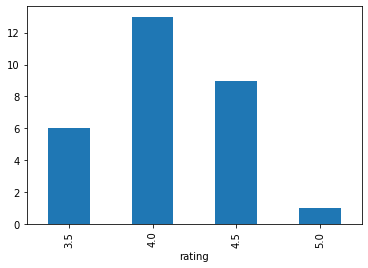

In [87]:
import matplotlib.pyplot as plt
import pandas as pd

VH.groupby('rating')['name'].nunique().plot(kind='bar')
plt.show()

It is clear that we have all the good reated hotels and few best hotels ( 5 rateing )

now lets visulize  the complete central pune location with all our data

In [88]:

Pune_map = folium.Map(location = [PUN_LATITUDE, PUN_LONGITUDE], zoom_start = 13)

for  name, latitude, longitude in zip( VA['name'],  VA['latitude'],  VA['longitude']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    
    folium.CircleMarker(
        [float(latitude), float(longitude)],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Pune_map) 
    
    
for  name, latitude, longitude in zip( VR['name'],  VR['latitude'],  VR['longitude']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    
    folium.CircleMarker(
        [float(latitude), float(longitude)],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.7,
        parse_html = False).add_to(Pune_map)
    
    
    
    
for  name, latitude, longitude in zip( VH['name'],  VH['latitude'],  VH['longitude']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    
    folium.CircleMarker(
        [float(latitude), float(longitude)],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.7,
        parse_html = False).add_to(Pune_map)    
    


    
Pune_map

# Phase 2 :  Running the k means algorithum to find out the best location in the central pune 

# Concatinate the data 

In [89]:
FV = {}

In [90]:
FV = pd.concat([VA, VR, VH]) 

In [126]:
FV =FV[FV['ranking'] !=0]

In [127]:
FV =FV[FV['rating'] !=0]

In [128]:
FV

,name,latitude,longitude,ranking,rating
4,Maratha Mandir,18.52047,73.85662,206.0,3.5
5,Jangali Maharaj Temple,18.51944,73.85618,64.0,4.0
7,Bandiwan Maruti Mandir,18.5192,73.8609,252.0,3.5
8,Vishrambaug Samaj Mandir,18.52401,73.85404,209.0,4.0
9,Tulsi Baug Shopping Market,18.514029,73.8555,50.0,4.0
...,...,...,...,...,...
25,Ramee Grand Hotel Pune,18.520535,73.84351,26.0,4.0
26,Hotel Sagar Plaza,18.520235,73.87657,27.0,4.0
27,Tarawade Clarks Inn - Pune,18.52389,73.84883,28.0,4.0
28,Hotel Aurora Towers,18.518154,73.87899,29.0,4.0


In [92]:

 

PPUN_map = folium.Map(location = [PUN_LATITUDE, PUN_LONGITUDE], zoom_start = 13)

for name, latitude, longitude, rating in zip( FV['name'], 
                                                           FV['latitude'], 
                                                         
                                                           FV['longitude'], 
                                                           FV['rating'].astype(float)):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    if(rating > 3.5):
        folium.Marker(
            [float(latitude), float(longitude)],
                icon = folium.Icon(color = 'green'),
                popup = label).add_to(PPUN_map) 
    else:
        folium.Marker(
            [float(latitude), float(longitude)],
                icon = folium.Icon(color = 'red'),
                popup = label).add_to(PPUN_map)  
            

PPUN_map

Now we are good to go lets run K mens classifier to find the best location based on the ratings

In [95]:
FV = FV.dropna()

In [96]:
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 3

clustering =  FV.drop(['name','latitude','longitude' ,'ranking'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
FV.insert(0, 'cluster_labels', kMeans.labels_)
FV.head(5)

,cluster_labels,name,latitude,longitude,ranking,rating
4,0,Maratha Mandir,18.52047,73.85662,206.0,3.5
5,1,Jangali Maharaj Temple,18.51944,73.85618,64.0,4.0
7,0,Bandiwan Maruti Mandir,18.5192,73.8609,253.0,3.5
8,1,Vishrambaug Samaj Mandir,18.52401,73.85404,209.0,4.0
9,1,Tulsi Baug Shopping Market,18.514029,73.8555,50.0,4.0


In [97]:
FV

,cluster_labels,name,latitude,longitude,ranking,rating
4,0,Maratha Mandir,18.52047,73.85662,206.0,3.5
5,1,Jangali Maharaj Temple,18.51944,73.85618,64.0,4.0
7,0,Bandiwan Maruti Mandir,18.5192,73.8609,253.0,3.5
8,1,Vishrambaug Samaj Mandir,18.52401,73.85404,209.0,4.0
9,1,Tulsi Baug Shopping Market,18.514029,73.8555,50.0,4.0
...,...,...,...,...,...,...
25,1,Shantai Hotel,18.519184,73.87688,26.0,4.0
26,1,Ketan Hotel,18.520506,73.84106,27.0,4.0
27,1,Hotel Aurora Towers,18.518154,73.87899,28.0,4.0
28,1,Residency Club,18.528929,73.87987,29.0,4.0


In [98]:
n = len(FV.loc[FV['cluster_labels'] == 1] )
n

39

Finding the Lat and Lng of the centroid of the high reated places 

In [100]:
Lat = Lng = 0.0
for i in range(n):
    Lat = Lat+ float(FV.loc[FV['cluster_labels'] == 1].iloc[i][2])
    Lng = Lng+ float(FV.loc[FV['cluster_labels'] == 1].iloc[i][3])
Lat = Lat/n
Lng = Lng/n
print(Lat)
print(Lng)

18.5190218974359
73.85682205128205


In [101]:
Lat=round(Lat,2)
Lng=round(Lng,2)

In [102]:

PPUN_map = folium.Map(location = [PUN_LATITUDE, PUN_LONGITUDE], zoom_start = 13)


label = 'Center_Lat_Lng'
label = folium.Popup(label, parse_html = True)
 
folium.Marker(
    [Lat, Lng],
        icon = folium.Icon(color = 'blue'),
        popup = label).add_to(PPUN_map) 





for name, latitude, longitude, rating in zip( FV['name'], 
                                                           FV['latitude'], 
                                                         
                                                           FV['longitude'], 
                                                           FV['rating'].astype(float)):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    if(rating > 3.5):
        folium.Marker(
            [float(latitude), float(longitude)],
                icon = folium.Icon(color = 'green'),
                popup = label).add_to(PPUN_map) 
    else:
        folium.Marker(
            [float(latitude), float(longitude)],
                icon = folium.Icon(color = 'red'),
                popup = label).add_to(PPUN_map)  
            

PPUN_map

From this we can conclude that the area around the Kasba peth and Shanivarwada is the best Area to visite in the City of Pune and here are veneus around that area

# Phase 3: Finding all the venues around the centroied 

In [103]:
 

FOURSQUARE_CLIENT_ID = 'AG4OYL0OISHM20FV5QGIDPAKH2HANSOCAVRDD4K33JKJCFPI'
FOURSQUARE_CLIENT_SECRET = 'ODIT1KCQ2GRXXIJFH32UF0P2IS0B0SNVDL0XFMKBN30KS2WT'
RADIUS = 2000 # 8 Km
NO_OF_VENUES = 300
VERSION = '20190612' # Current date

In [104]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [105]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        Lat, 
                                                                        Lng, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)
    
    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 100 venues fetched within a total radius of 2.0 Km
Total 8 venues fetched within a total radius of 2.0 Km

Total 108 venues fetched


In [106]:
foursquare_venues

,name,categories,lat,lng
0,Lal Mahal,Historic Site,18.518720,73.856556
1,Sujata Mastani,Ice Cream Shop,18.511793,73.852145
2,Raja Dinkar Kelkar museum,History Museum,18.510744,73.854389
3,Hotel Madhuban,Tea Room,18.519248,73.848688
4,Coconut Grove,Seafood Restaurant,18.525681,73.866989
5,Bhagat Tarachand,Indian Restaurant,18.514332,73.851317
6,Krishna Juice Bar,Juice Bar,18.523553,73.847651
7,Mad Over Donuts,Donut Shop,18.519335,73.845320
8,Shree Wadeshwar Bhuvan,Vegetarian / Vegan Restaurant,18.510753,73.853748
9,Café Coffee Day,Coffee Shop,18.523131,73.848347


## Now we have the best area to visit and all the good venues around it , then lets get started !!!!!  :) 
    